In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
# Build image classification model using CNN on fashion MNIST dataset.
import numpy as np
import pandas as pd # !pip install pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
#from sklearn.metrics import classification_report, confusion_matrix  # !pip install scikit-learn
#import seaborn as sns # !pip install seaborn

In [107]:
# Step 1 Load the training and testing data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [108]:
# Step 2 Extract features (input data) from the training dataset, excluding the first column
X_train = train_data.iloc[:, 1:].values  
X_test = test_data.iloc[:, 1:].values

# Extract labels (output data) from the first column of the training dataset
y_train = train_data.iloc[:, 0].values
y_test = test_data.iloc[:, 0].values
# The colon (:) before the comma means "select all rows."
# The 0 after the comma specifies the first column 
# 1 refers to the second column, and the colon indicates to include everything after it.

In [109]:
# Step 3 Reshape the training data to have a shape of (number of samples, height, width, channels)
# Here, we assume the images are 28x28 pixels and grayscale (1 channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

# Reshape the test data similarly to the training data
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


In [110]:
# Step 4 Normalize the pixel values to [0, 1],making it easier for the neural network to learn.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [111]:
# Step 5: One-hot encode the labels
# One-hot encode the labels. For example, if the digit is 3, it becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This format is needed for multi-class classification.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [112]:
# Step 6 Build the model
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(28, 28, 1)),       # Input layer for 28x28 grayscale images with 1 channel
    Conv2D(32, (3, 3), activation='relu'),  # First Conv layer with 32 filters
    MaxPooling2D((2, 2)),                    # First Max Pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Second Conv layer with 64 filters
    MaxPooling2D((2, 2)),                    # Second Max Pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Third Conv layer with 64 filters
    Flatten(),                               # Flattening for Dense layers
    Dense(64, activation='relu'),           # Dense layer with 64 units
    Dropout(0.3),                           # Dropout layer with 50% dropout
    Dense(10, activation='softmax')         # Output layer for 10 classes
])


In [113]:
# Step 7 Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
# Step 8 Train the model on the training data
history = model.fit(X_train, y_train, 
                    epochs=10,              # Number of passes through the entire training dataset
                    batch_size=64,          # Number of samples per gradient update (mini-batch size)
                    validation_split=0.2,   # Reserve 20% of the training data for validation
                    verbose=2)              # Verbosity mode, 2 means showing one line per epoch

# The model will update its weights after processing every 64 samples (a mini-batch). Smaller batches provide more updates per epoch but may lead to more noise in the gradient estimates. Larger batches offer more stable updates but may require more memory.
# verbose=2, This controls the amount of output during training. A setting of 2 prints a line for each epoch, showing the training and validation loss and accuracy.

Epoch 1/10
750/750 - 14s - 19ms/step - accuracy: 0.7511 - loss: 0.6739 - val_accuracy: 0.8294 - val_loss: 0.4625
Epoch 2/10
750/750 - 10s - 13ms/step - accuracy: 0.8425 - loss: 0.4315 - val_accuracy: 0.8716 - val_loss: 0.3484
Epoch 3/10
750/750 - 10s - 13ms/step - accuracy: 0.8702 - loss: 0.3629 - val_accuracy: 0.8847 - val_loss: 0.3186
Epoch 4/10
750/750 - 10s - 14ms/step - accuracy: 0.8831 - loss: 0.3236 - val_accuracy: 0.8915 - val_loss: 0.2998
Epoch 5/10
750/750 - 13s - 18ms/step - accuracy: 0.8908 - loss: 0.2991 - val_accuracy: 0.8976 - val_loss: 0.2819
Epoch 6/10
750/750 - 13s - 17ms/step - accuracy: 0.9009 - loss: 0.2755 - val_accuracy: 0.9078 - val_loss: 0.2627
Epoch 7/10
750/750 - 12s - 16ms/step - accuracy: 0.9063 - loss: 0.2577 - val_accuracy: 0.9103 - val_loss: 0.2632
Epoch 8/10
750/750 - 11s - 15ms/step - accuracy: 0.9135 - loss: 0.2412 - val_accuracy: 0.9085 - val_loss: 0.2545
Epoch 9/10
750/750 - 12s - 16ms/step - accuracy: 0.9171 - loss: 0.2267 - val_accuracy: 0.9068 - 

In [115]:
#Evaluating
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'test_loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# test_loss: Represents the loss value, indicating how well the model performs on the test data (lower is better).
# test_acc: Represents the accuracy of the model on the test data, showing the percentage of correct predictions.

313/313 - 2s - 6ms/step - accuracy: 0.9124 - loss: 0.2379
test_loss: 0.23791232705116272
Test Accuracy: 0.9124000072479248


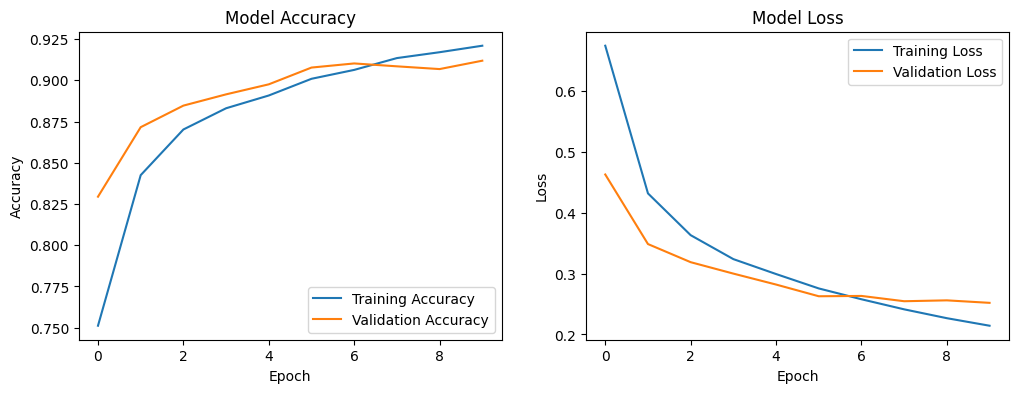

In [116]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')


plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


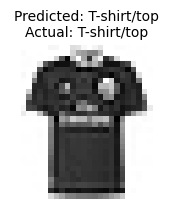

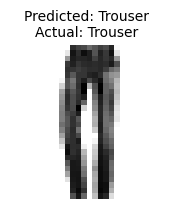

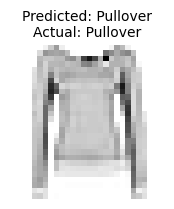

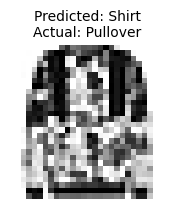

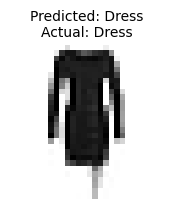

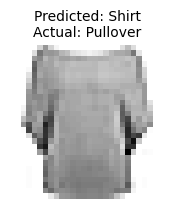

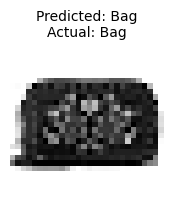

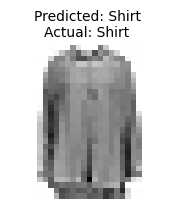

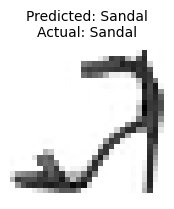

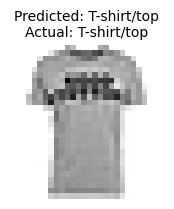

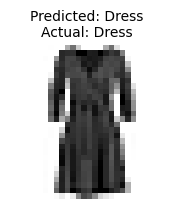

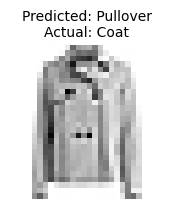

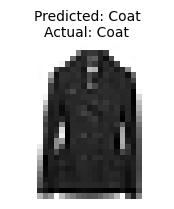

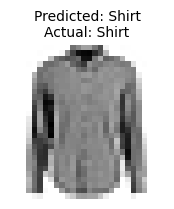

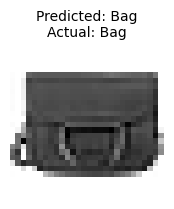

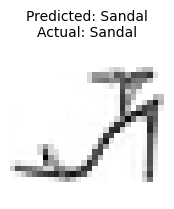

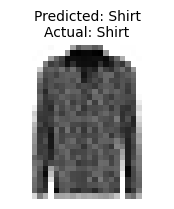

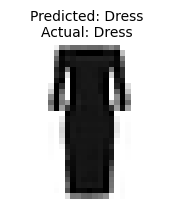

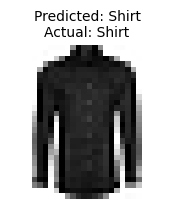

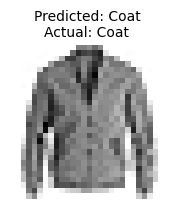

In [13]:
# Generate predictions on the test set
y_pred_probs = model.predict(X_test)      # model.predict(X_test) returns an array of predicted probabilities for each class for each test image.
y_pred = np.argmax(y_pred_probs, axis=1)  # np.argmax(y_pred, axis=1) finds the index of the highest probability for each image, giving the predicted class label for each one.
y_true = np.argmax(y_test, axis=1)        # Convert one-hot encoded true labels to class labels # Assuming `y_test` is the ground truth labels for `X_test`

# Define the class labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display a few test images with predictions
num_images_to_show = 20  # Number of images to display

for i in range(num_images_to_show):
    plt.figure(figsize=(2, 2))

    # Plot the image
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)  # Display the i-th test image in grayscale
    plt.axis('off')  # Hide axes for a cleaner display

    # Show the predicted and actual labels
    predicted_label = labels[y_pred[i]]
    actual_label = labels[y_true[i]]
    plt.title(f'Predicted: {predicted_label}\nActual: {actual_label}', fontsize=10)

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


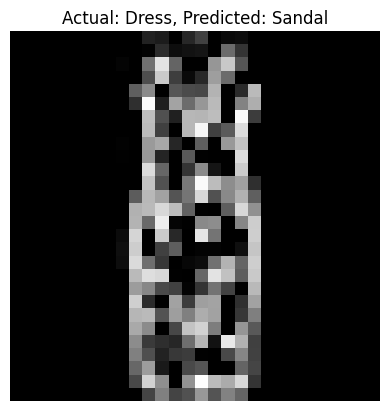

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

def display_prediction(image_array, actual_label=None):
    # Reshape and normalize the image
    img_array = image_array.reshape(1, 28, 28, 1) / 255.0  # Normalize and add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get the class labels for Fashion MNIST (0-9, representing classes like 'T-shirt', 'Trouser', etc.)
    class_labels = [
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]
    predicted_label = class_labels[predicted_class]

    # Display the image
    plt.imshow(image_array.reshape(28, 28), cmap='gray')
    
    # Set title with actual and predicted labels
    if actual_label is not None:
        actual_label_name = class_labels[actual_label]
        plt.title(f'Actual: {actual_label_name}, Predicted: {predicted_label}')
    else:
        plt.title(f'Predicted: {predicted_label}')

    plt.axis('off')
    plt.show()

# Usage example
# Replace X_test[i] with the test image you want to predict
display_prediction(X_test[155], actual_label=np.argmax(y_test[155]))
